In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [5]:
white = pd.read_csv('winequality-white.csv',sep = ';')
red = pd.read_csv('winequality-red.csv',sep = ';')

In [6]:
color_w = ['w']* len(white)
white['color'] = color_w

color_r = ['r']* len(red)
red['color'] = color_r

In [7]:
red.head()
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,w
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,w
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,w
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,w
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,w


In [8]:
wine = pd.concat([white, red], ignore_index=True, sort=False)

In [9]:
wine.head()
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,r
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,r
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,r
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,r
6496,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,r


In [10]:
Y1 = wine['color']
Y2 = wine['quality']
X = wine.drop(['color','quality'], axis = 1) #extract the predictor and target variables 

# train one model to learn to classify the color
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X,Y1,test_size = 0.8, random_state=1)

# second model to classify the quality
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X,Y2,test_size = 0.8, random_state=1)


In [11]:
# classify whether wine is red or white

cls1 = SVC().fit(X1_train, Y1_train)
accuracy_train = accuracy_score(Y1_train, cls1.predict(X1_train))
accuracy_test = accuracy_score(Y1_test, cls1.predict(X1_test))
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 93.53%
Test Accuracy: 93.36%


In [12]:
# classify the quality of wine (0-10)

cls2 = SVC().fit(X2_train, Y2_train)
accuracy_train = accuracy_score(Y2_train, cls2.predict(X2_train))
accuracy_test = accuracy_score(Y2_test, cls2.predict(X2_test))
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 43.80%
Test Accuracy: 43.63%


Group 8: 
Wine classification 

1- You have done a baseline with SVM

2- Evaluation: Confusion matrix 

3- If this issue is data imbalance? Maybe separate two model one for what and one for red.
3.5- Deal data imbalance. Upsampling or weighting the loss

4- Apply other classic learning: Decisions trees, random forest => explore your library can quantize the data for you. 

5- Feature analysis: what features are important, Ablation: remove each feature. Depending on your model:  for example check weights. Level of the features in DT, e.g. if it is in the root. 

6- PyTorch: see if it is competitive or not.    

7- Error analysis.

In [13]:
confusion_matrix = metrics.confusion_matrix(Y2_test, cls2.predict(X2_test))
confusion_matrix

array([[   0,    0,    0,   20,    0,    0,    0],
       [   0,    0,    0,  170,    0,    0,    0],
       [   0,    0,    0, 1700,    0,    0,    0],
       [   0,    0,    0, 2268,    0,    0,    0],
       [   0,    0,    0,  889,    0,    0,    0],
       [   0,    0,    0,  146,    0,    0,    0],
       [   0,    0,    0,    5,    0,    0,    0]], dtype=int64)

## Initial Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
clf1 = DecisionTreeClassifier(random_state=0)
clf1.fit(X1_train, Y1_train)

DecisionTreeClassifier(random_state=0)

In [21]:
clf1.score(X1_test, Y1_test)

0.9774913428241632

In [22]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X2_train, Y2_train)

DecisionTreeClassifier(random_state=0)

In [23]:
clf2.score(X2_test, Y2_test)

0.4697960754136206

## Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
clf_forest = RandomForestClassifier(max_depth=3, random_state=0)
clf_forest.fit(X1_train, Y1_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [103]:
clf_forest.score(X1_test, Y1_test)

0.9848018468641785

In [110]:
clf_forest2 = RandomForestClassifier(max_depth=10, random_state=0)
clf_forest2.fit(X2_train, Y2_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [111]:
clf_forest2.score(X2_test, Y2_test)

0.5748364755675259

## Upsampling

Total: 6497
quality 1 : 0
quality 2 : 0
quality 3 : 30
quality 4 : 216
quality 5 : 2138
quality 6 : 2836
quality 7 : 1079
quality 8 : 193
quality 9 : 5
quality 10 : 0


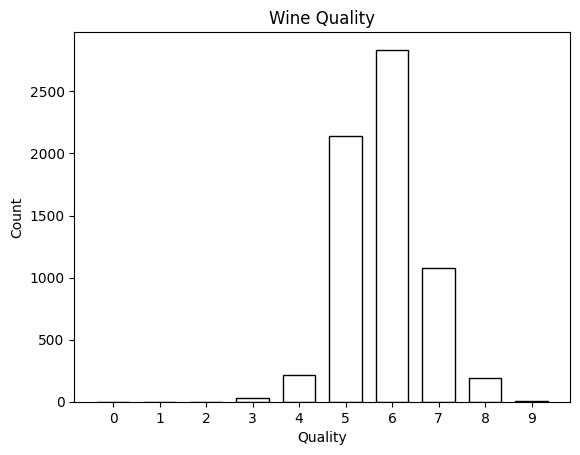

In [36]:
print("Total:",len(wine))

for i in range(1,11):  
    print("quality",i,":",len(wine[wine["quality"] == i]))
    
plt.hist(wine["quality"], range = (0,10), align = 'left', rwidth=0.7, color = "white" ,ec = "black")
plt.title("Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.xticks(range(10))
plt.show()


In [46]:
from sklearn.utils import resample

In [67]:
up_wine = resample(wine[wine["quality"] == 6],
             replace=True,
             n_samples=500,
             random_state=42)
for quality in [3, 4, 5, 7, 8, 9]:
    upsample = resample(wine[wine["quality"] == quality],
             replace=True,
             n_samples=500,
             random_state=42)
    up_wine = pd.concat([up_wine, upsample], ignore_index=True, sort=False)

In [68]:
Y1_up = up_wine['color']
Y2_up = up_wine['quality']
X_up = up_wine.drop(['color','quality'], axis = 1) #extract the predictor and target variables 

# train one model to learn to classify the color
X1_train_up, X1_test_up, Y1_train_up, Y1_test_up = train_test_split(X_up,Y1_up,test_size = 0.8, random_state=1)

# second model to classify the quality
X2_train_up, X2_test_up, Y2_train_up, Y2_test_up = train_test_split(X_up,Y2_up,test_size = 0.8, random_state=1)

In [69]:
clf_forest2_up = RandomForestClassifier(max_depth=3, random_state=0)
clf_forest2_up.fit(X2_train_up, Y2_train_up)

RandomForestClassifier(max_depth=3, random_state=0)

In [70]:
clf_forest2_up.score(X2_test_up, Y2_test_up)

0.4878571428571429

In [71]:
clf_forest2_up.score(X2_test, Y2_test)

0.29222777991535204

Initial upsampling led to overfitting and poor performance

## Using SMOTE with Random Forests

In [74]:
from imblearn.over_sampling import SMOTE

In [82]:
sm = SMOTE(random_state=42,k_neighbors = 3)
X_res, y_res = sm.fit_resample(X, Y2)

In [86]:
X2_train_res, X2_test_res, Y2_train_res, Y2_test_res = train_test_split(X_res,y_res,test_size = 0.8, random_state=1)

In [115]:
clf_forest2_res = RandomForestClassifier(max_depth=15, random_state=0)
clf_forest2_res.fit(X2_train_res, Y2_train_res)

RandomForestClassifier(max_depth=15, random_state=0)

In [116]:
clf_forest2_res.score(X2_test_res, Y2_test_res)

0.7830248079586953

In [117]:
clf_forest2_res.score(X2_test, Y2_test)

0.6260100038476337